## EDA에 꼭 필요한, 주요 데이터 시각화 그래프 
1. 데이터 종류
2. 데이터 시각화  
    2-1. 수치형 데이터 시각화 : 변수 1개 / 2개 이상  
        - 변수 1개 : hist, distplot, boxplot
        - 변수 2개 이상: heatmap, lineplot, scatterplot, regplot
    2-2. 범주형 데이터 시각화 : 변수 1개 / 2개 이상  
        - 변수 1개: countplot, pie
        - 변수 2개 이상: barplot, pointplot, boxplot, violinplot
3. 한번에 여러개의 plot 그리기: `plt.subplots`  
    `참고` 데이터 꾸미기 : figsize, x/y축 이름, tick, title

---
## 1. 데이터 종류
1) 수치형 데이터(numerical data) -> 사칙연산 가능  
- 연속형 데이터(continuous): 실수 / ex. 키, 몸무게
- 이산형 데이터(discrete): 정수 / ex. A반 학생 수

2) 범주형 데이터(categorical data) -> 사칙연산 불가능  
- 순서형 데이터(ordinal)  / ex. 학점, 설문조사 점수 등. 순위가 있다
- 명목형 데이터(nominal)  / ex. 성별, 우편번호 등. 순위가 없다   

---
## 2. 데이터 시각화
### 2-1. 수치형(numerical) 데이터 시각화
- 수치형 데이터는 일정한 범위 내에서 **어떻게 분포(distribution)되어 있는지**가 중요하다!!

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips') #꼭 데이터셋이 저장되어있지 않더라도 seaborn 상에서 바로 가져올 수 있음 
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# 어떤 것이 수치형 데이터일까?
## 보통은 describe 했을 때 나오는 값이 수치형이다. 다만, 숫자로 되어있기만 하면 전부 나오기 때문에 category 데이터여도 뽑혀나옴에 주의
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


여기선 수치형 데이터 `total_bill, tip`에 대해 시각화를 해보자.  

### 수치형 변수 1개
- 히스토그램: plt.hist()
- 히스토그램+커널밀도함수: sns.distplot()
- 박스플롯: sns.boxplot()

#### 1) 히스토그램
수치형 데이터의 구간별 빈도수 그래프   
형태: **plt**, `data[col].hist(bins = )`

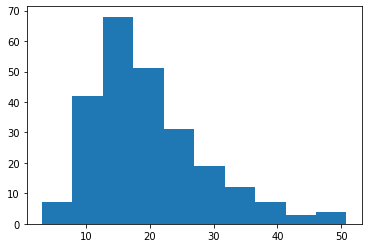

In [4]:
plt.hist(tips['total_bill'])
plt.show()

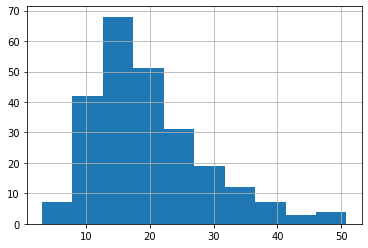

In [5]:
tips['total_bill'].hist()
plt.show()

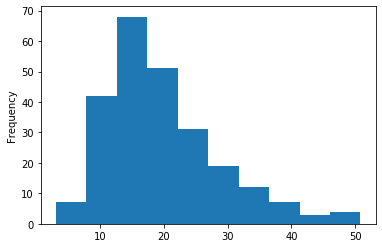

In [6]:
tips['total_bill'].plot.hist()
plt.show()

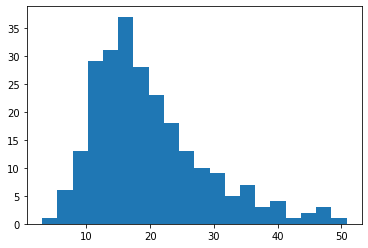

In [7]:
# bins 고정
plt.hist(tips['total_bill'], bins = 20)
plt.show()

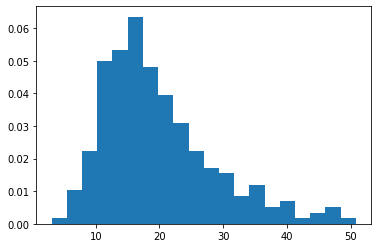

In [8]:
# y축 비율로 바꿈
plt.hist(tips['total_bill'], bins = 20, density = True)
plt.show()

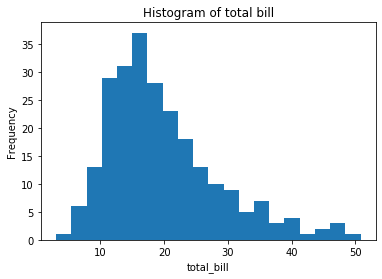

In [9]:
#꾸미기
plt.hist(tips['total_bill'], bins = 20)

plt.xlabel('total_bill')
plt.ylabel('Frequency')
plt.title('Histogram of total bill')
plt.show()

#### 2) 분포도 
히스토그램과 커널밀도함수 그래프를 함께 그려주는 그래프 (보통 얘를 주로 사용한다)  
**sns**, `sns.distplot(data[x], kde = True, hist = True)`  
- [참고] 히스토그램은 y축이 디폴트로 빈도(frequency) 즉, 개수를 세는 반면
- distplot은 y축이 비율로 계산된다.

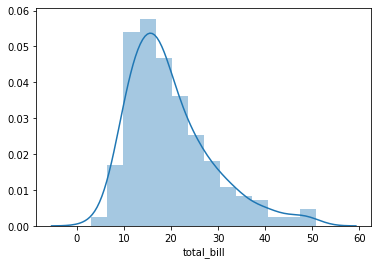

In [10]:
sns.distplot(tips['total_bill'])
plt.show()

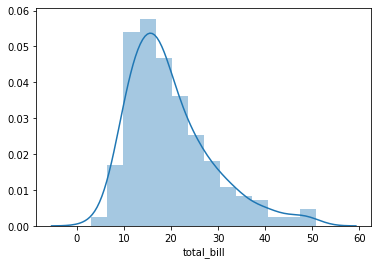

In [11]:
# 디폴트 
sns.distplot(tips['total_bill'], kde = True, hist = True)
plt.show()

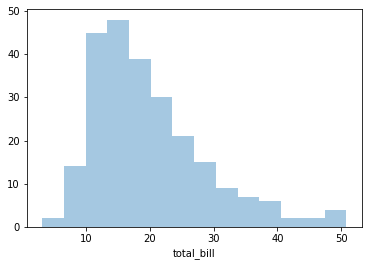

In [12]:
sns.distplot(tips['total_bill'], kde = False, hist = True) #히스토그램 
plt.show()

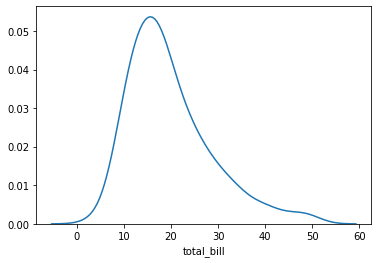

In [13]:
sns.distplot(tips['total_bill'], kde = True, hist = False) #커널밀도그래프
plt.show()

#### 3) 박스플롯 
똑같이 분포를 보여주는데, 위의 2개는 데이터의 전체 현황을 보여준다면  
boxplot은 박스 모양으로 여러 가지 정보를 알려준다. (최솟값, 최댓값, Q1, Q2(중위수), Q3, outlier)  
**sns**, `sns.boxplot(x or y, data)`

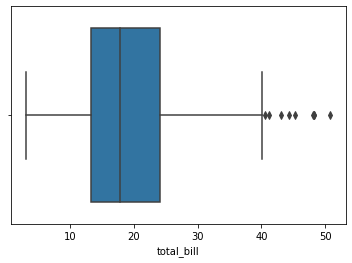

In [14]:
sns.boxplot(tips['total_bill'])
plt.show()

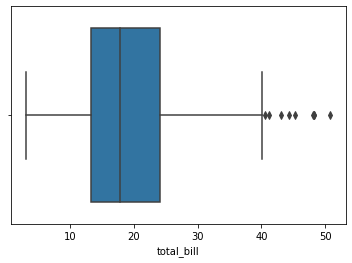

In [15]:
# 디폴트
sns.boxplot(x = 'total_bill', data = tips)
plt.show()

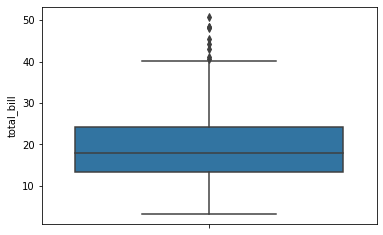

In [16]:
# boxplot 세우기
sns.boxplot(y = 'total_bill', data = tips)
plt.show()

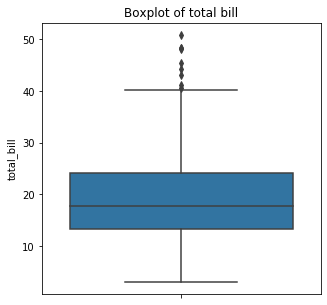

In [17]:
# 꾸미기
plt.figure(figsize = (5,5))
sns.boxplot(y = 'total_bill', data = tips)
plt.title('Boxplot of total bill')
plt.show()

### 수치형 변수 2개 이상(변수 간 관계 확인)
- 히트맵: 변수 간 상관관계를 시각화 / sns.heatmap()
- 라인플롯: sns.lineplot()
- 산점도: sns.scatterplot()
- 회귀선과 산점도를 함께: sns.regplot()

#### 1) 히트맵 

In [18]:
# 먼저 tips 를 다시 보자.
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [19]:
# tips 데이터셋의 상관계수 구하기-> 알아서 수치형 변수들 간 상관계수가 구해진다.(대각선만 보기)
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


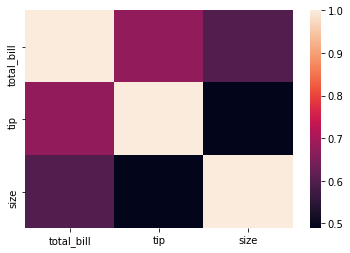

In [20]:
# 위의 테이블 형태를 그대로 sns.heatmap 안에 넣으면 끝
tip_cor = tips.corr()
sns.heatmap(tip_cor)

상관계수가 높을수록 두 변수 간 상관성이 높다는 뜻이다.  
여기선 오른쪽 색상막대를 보면 색이 옅은색에 가까울수록 상관성이 높은데, 특히 tip과 total_bill 간 상관성 높음

In [69]:
# 혹은 피봇 형태로 만들어서 히트맵 안에 넣어도 된다!
## 이는 주로 index와 column 값이 범주형 데이터이고, 이 값에 따라 수치형 데이터(values)가 어떻게 
## 변동하는지 궁금할 때 사용 
tip_pivot = pd.pivot_table(index = 'time', columns = 'size', values = 'tip', aggfunc = 'mean',data = tips)
tip_pivot

size,1,2,3,4,5,6
time,,,,,,
Lunch,1.875,2.423077,2.754,4.2180,5.000,5.3
Dinner,1.000,2.661923,3.490,4.1225,3.785,5.0


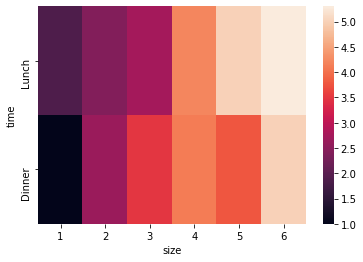

In [22]:
sns.heatmap(tip_pivot)

**size(식사 인원수)와 time(식사 시간)에 따라 tip(팁) 이 어떻게 달라지는지**가 궁금하여 히트맵으로 표현.  
색이 옅을수록 tip이 커지는데, 주로 size가 커질수록, Lunch 일수록 tip이 커지는 경향이 있다.  
하지만 size가 2-3명인 경우는 Dinner일 때 tip을 더 많이 주었다.

In [23]:
tip_pivot2 = pd.pivot_table(index = 'time', columns = 'day', values = 'tip', data = tips)
tip_pivot2

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,2.767705,2.382857,NaN,NaN
Dinner,3.000000,2.940000,2.993103,3.255132


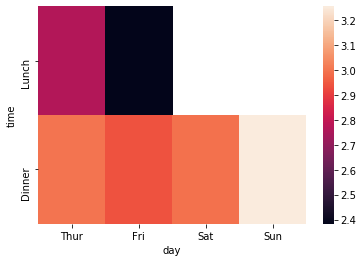

In [24]:
sns.heatmap(tip_pivot2)

#### 2) 라인플롯 
두 수치형 데이터 사이의 관계를 **선**으로 나타낸다.   
*x에는 이산형 데이터, y에는 연속형 데이터를 쓰면 좋다* (e.g. year에 따른 연소득 그래프)    
*그 이유는 나타나는 값이 x에 따른 y의 평균이기 때문!*  
`sns.lineplot(x, y, data, hue(범주형))`

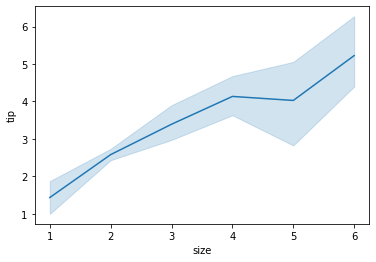

In [25]:
# 두 수치형 데이터 size, tip 간 관계를 시각화
sns.lineplot(x = 'size', y = 'tip', data = tips)

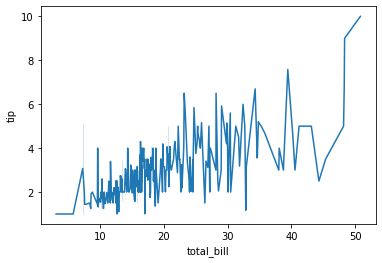

In [26]:
# 만일 x, y 둘 다 연속형을 쓰면,, 그림이 좀 이상해짐 -> 이럴 때는 산점도를 쓰자!(바로 밑에서 이어짐)
sns.lineplot(x = 'total_bill', y = 'tip', data = tips)

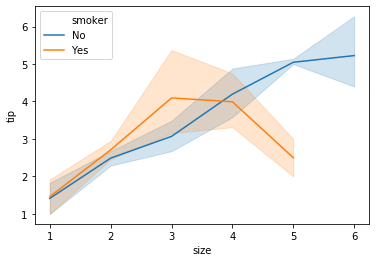

In [27]:
# 참고로 hue에 범주형 데이터를 넣어서 선을 다양화할 수 있다.
# size에 따른 tip의 여부 - smoker 여부에 따라 달라지는지 체크
sns.lineplot(x= 'size', y = 'tip', hue = 'smoker', data = tips)

smoker가 아닌 경우(No)는 size가 커질수록 tip이 정비례하고 있다.  
`참고` 표시되는 선은 평균, 그 주변은 95% CI를 의미

#### 3) 산점도 
두 수치형 데이터 간 관계를 **점**으로 나타낸다.  
*x와 y 모두 연속형 데이터인 경우 좋다.*  (e.g. GDP와 행복도 간 관계)   
`sns.scatterplot(x, y, data, hue(범주형))`

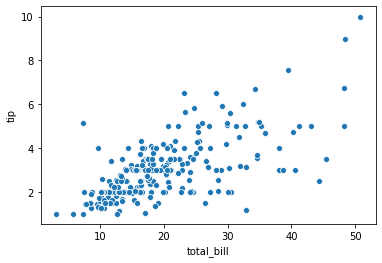

In [28]:
# 위에서 이상해보였던 total_bill과 tip 간 그래프를 산점도로 다시 그려보자 
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

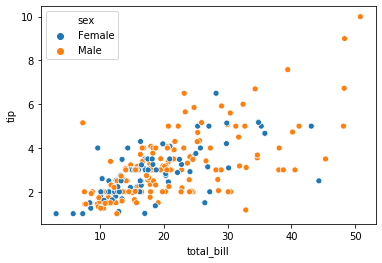

In [29]:
# 마찬가지로 hue에 범주형 변수를 넣어 시각화 가능
# total_bill과 tip 간 그래프를 성별에 따라 나눠 그리면
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

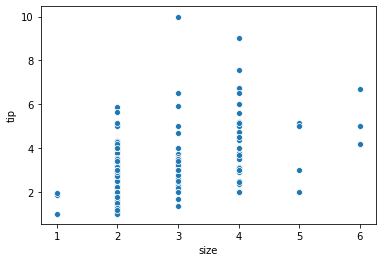

In [30]:
# 물론 산점도에도 이산형 변수에 따라 연속형 변수를 그려도 됨 -> 하지만 이땐 lineplot이 더 직관적이다!
sns.scatterplot(x = 'size', y = 'tip', data = tips)

#### 4) regplot
산점도와 회귀선을 동시에 그려주는 유용한 함수. (선의 음영은 95% CI를 의미)  
*x와 y 모두 연속형 데이터일 때 좋다*  
`sns.regplot(x, y, data, marker, ci, data)`

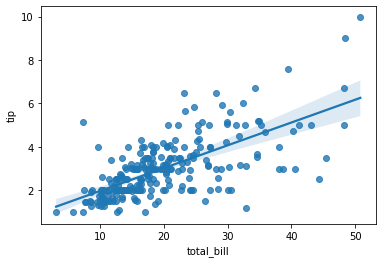

In [31]:
# total_bill & tip 간 관계
sns.regplot(x= 'total_bill', y = 'tip', data = tips)

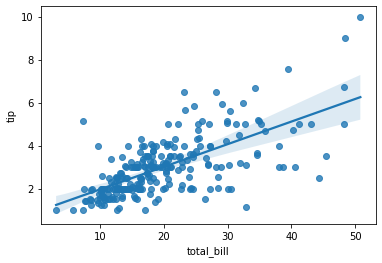

In [32]:
# 꾸미기 옵션
# 99% 신뢰구간으로 늘리면 
sns.regplot(x= 'total_bill', y = 'tip', data = tips, ci = 99)

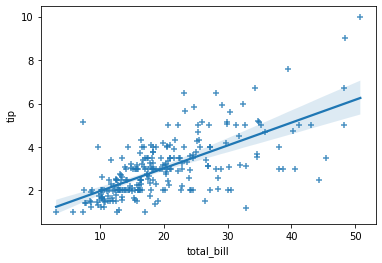

In [33]:
# marker 모양 바꾸기
sns.regplot(x= 'total_bill', y = 'tip', data = tips, marker= '+')

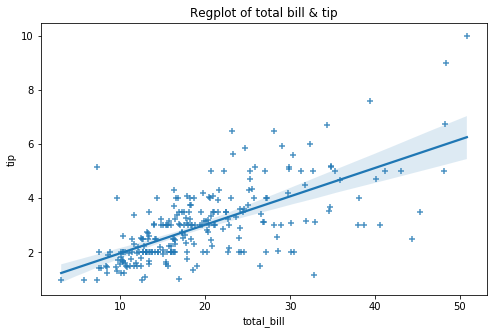

In [34]:
# 그림 사이즈와 제목 수정
plt.figure(figsize = (8, 5))
sns.regplot(x= 'total_bill', y = 'tip', data = tips, marker= '+')
plt.title('Regplot of total bill & tip')
plt.show()

#### x가 이산형 변수일 때 달라지는 옵션
- jitter, estimator 등

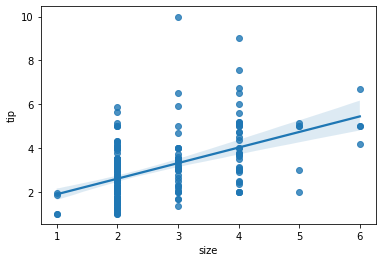

In [35]:
sns.regplot(x = 'size', y = 'tip', data = tips)

jitter 옵션
- x_jitter , y_jitter를 사용할 수 있으며 x 또는 y 변수에 약간의 노이즈를 첨가한다.

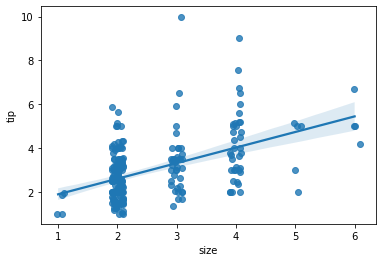

In [36]:
sns.regplot(x = 'size', y = 'tip', data = tips, x_jitter = .1)

x_estimator 옵션
- x가 discrete할 때 유용하게 쓰이며, x값에 따른 y값의 지표를 설정.
- 이를테면 np.mean이면 x값에 따른 y값의 평균을 point로, 음영으로는 신뢰구간을 나타냄

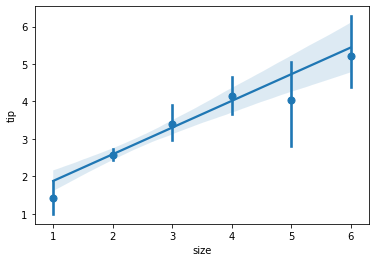

In [37]:
# size에 따른 tip의 평균값 도출 - lineplot과 비슷하게 그려진다.
import numpy as np
sns.regplot(x = 'size', y = 'tip', data = tips, x_estimator = np.mean)

### 2-2. 범주형 데이터 시각화
### 1. 범주형 변수 1개
- 카운트플롯 : countplot()
    - x: category / y: 각 category별 **개수**
- 파이: pie(x, labels)
    - x: category **비율**

In [38]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### 1) countplot: category별 개수 확인
주로 범주형 피처나 범주형 타깃값의 분포를 파악하는 용도로 사용.  
**sns** / `sns.countplot(x or y, data)`

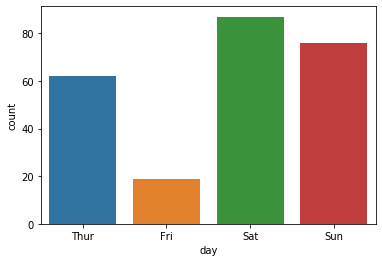

In [39]:
# 예를 들어 day별로 몇 개인지 살펴보자
sns.countplot(x = 'day', data = tips)

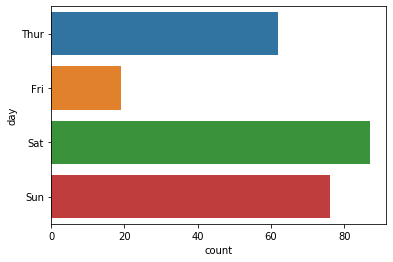

In [40]:
# bar의 위치 반대로
sns.countplot(y = 'day', data = tips)

#### 2) pie chart: 범주형 데이터의 비율 구하기
**plt**, `plt.pie(x, labels, autopct)`  
    - x: 비율
    - labels: 범주형 데이터의 레이블
    - autopct: 비율을 숫자로 표현할 때 형식 설정

In [41]:
# 여성, 남성 비율을 구해보자.
pd.DataFrame(tips['sex'].value_counts()/tips['sex'].count())

,sex
Male,0.643443
Female,0.356557


In [42]:
new = pd.DataFrame(tips['sex'].value_counts()/tips['sex'].count())
new.reset_index(inplace = True)
new

,index,sex
0,Male,0.643443
1,Female,0.356557


In [43]:
# 비율
print(list(new['sex']))
# labels
print(list(new['index']))

[0.6434426229508197, 0.35655737704918034]
['Male', 'Female']


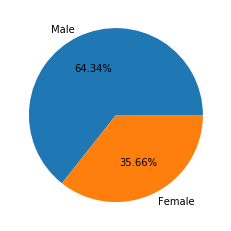

In [44]:
# 위 리스트를 갖고 파이 그래프를 그리기
plt.pie(x = list(new['sex']), 
           labels = list(new['index']),
           autopct = '%.2f%%')
plt.show()

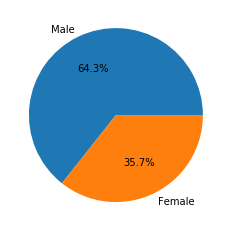

In [45]:
plt.pie(x = list(new['sex']), 
           labels = list(new['index']),
           autopct = '%.1f%%') #소수점 1자리까지만 보이게 
plt.show()

### 2. 변수 2개 이상 (변수 간 관계 파악)
주로 범주형 변수와 수치형 변수가 섞여서 사용됨.  

- 막대그래프 : barplot()
    - x: category / y: numerical **평균**
- 포인트플롯 : pointplot() -> barplot과 같은 기능이지만, `한 화면에 여러 그래프를 그릴 때` 주로 사용하면 좋다. (여러 그래프를 그려도 안 겹쳐 보이기 때문!!)
    - x: category / y: numerical **평균**
- 박스플롯 : boxplot()
    - x: category / y: numerical *분포*
- 바이올린플롯 : violinplot()
    - x: category / y: numerical *분포 + 양상*
    
**참고로, y축이 수치형 데이터의 평균을 구해주는 `barplot, pointplot`은 estimator 옵션으로 평균 말고 다른값(중앙값, 최댓값 등)도 구해진다.**

In [46]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### 1) barplot
**x축: 범주형 데이터(category) / y축: 수치형 데이터의 `평균값`**  
**sns**, `sns.barplot(x=, y= , data= , estimator)`

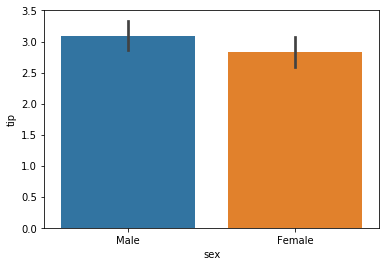

In [47]:
# 성별 tip의 평균값
sns.barplot(x = 'sex', y = 'tip', data = tips)

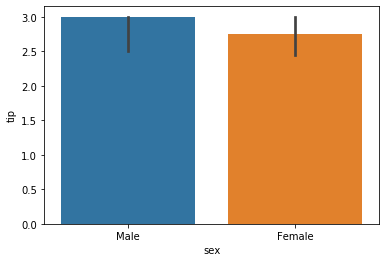

In [48]:
# 성별 tip의 중위값
sns.barplot(x = 'sex', y = 'tip', data = tips, estimator = np.median)

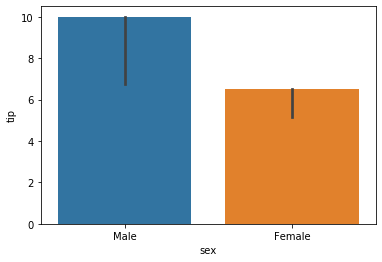

In [49]:
# 성별 tip의 최댓값  
sns.barplot(x = 'sex', y = 'tip', data = tips, estimator = np.max)

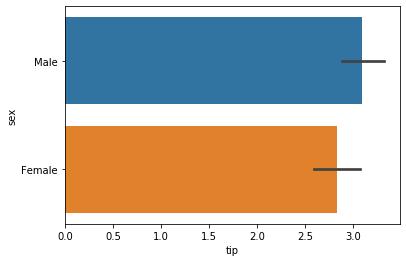

In [50]:
## 그래프 가로로 그리기 -> x, y 위치 변경 
# 성별 tip의 평균값
sns.barplot(y = 'sex', x = 'tip', data = tips)

#### 2) pointplot : barplot과 동일한 기능이지만 선과 점으로 표현
**x축: 범주형 데이터(category) / y축: 수치형 데이터의 `평균값`**  
**sns**, `sns.pointplot(x= , y = , data= )`

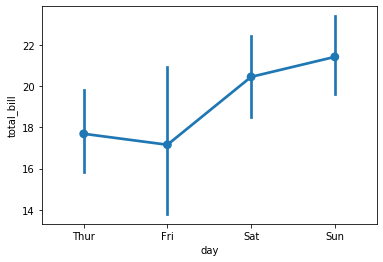

In [51]:
# 요일(day)별 total_bill의 평균값
sns.pointplot(x = 'day', y = 'total_bill', data = tips)

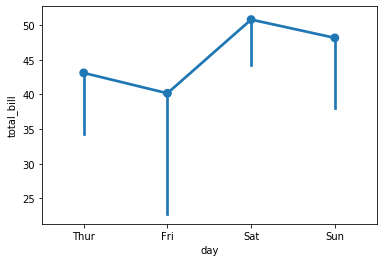

In [52]:
# 요일별 total_bill의 최댓값 
sns.pointplot(x = 'day', y = 'total_bill', data = tips, estimator = np.max)

#### 3) boxplot: 앞의 두 그래프와 비슷하지만 더 많은 정보를 보여주는 그래프
*앞의 두 그래프는 y축이 전부 `평균`값을 보여주는 반면, boxplot은 `분포`를 보여준다.*  
**x축: 범주형 데이터(category) / y축: 수치형 데이터의 `분포`**  
**sns**, `sns.boxplot(x= , y = , data=)`

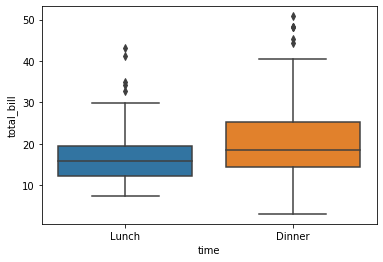

In [53]:
# 식사 시간(time)별 total_bill의 분포
sns.boxplot(x = 'time', y = 'total_bill', data = tips)

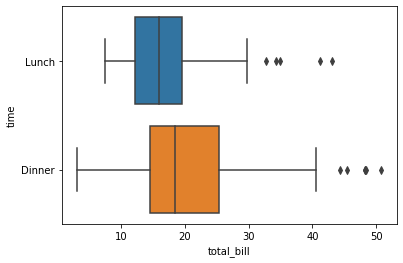

In [54]:
# 그래프 눕히기 -> x, y 위치 변경 
sns.boxplot(y = 'time', x = 'total_bill', data = tips)

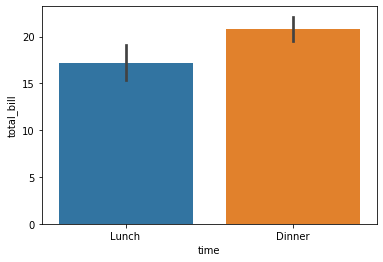

In [55]:
#만일 식사 시간별 "평균" total_bill만 보고싶다면?
sns.barplot(x='time', y='total_bill', data=tips)

#### 4) violinplot: boxplot + kdeplot
boxplot과 같지만, 커널밀도함수 모양을 가지고 있는 그래프이다.  
**sns** / `sns.violinplot(x= , y = , data=, hue)`

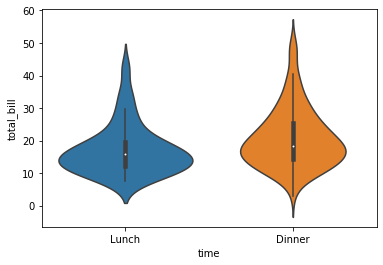

In [56]:
# time별 total_bill 분포
sns.violinplot(x= 'time', y = 'total_bill', data= tips)

가운데의 까만색 직사각형 모양이 Q1~Q3를 나타낸다. (가운데 흰색 점이 Q2:중위수)  
그리고 boxplot과는 달리, violinplot은 각 그래프별 분포 양상이 그래프 형태로 나타난다.   
-> 이걸 보면, 가장 중위수에 값이 몰린건 `Lunch > Dinner`(좀더 몰린 분포)   
-> 뭐 이건 Q1, Q2, Q3 boxplot의 간격으로 볼수도 있지만,, violinplot은 좀 더 직관적으로 보여줌

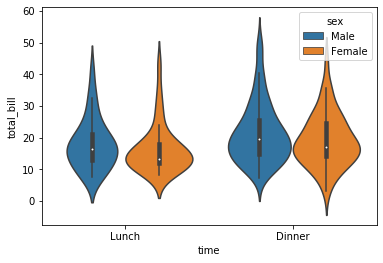

In [57]:
# time별 total bill 분포 - 성별에 따라 다르게
sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips)

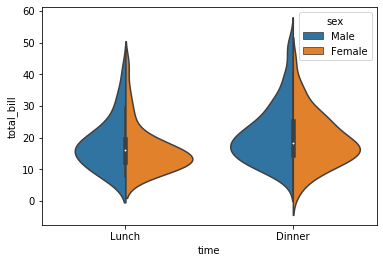

In [58]:
#split 버전
sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True)

`split = True` 옵션을 쓰면 더 성별에 따른 분포가 확연하게 보인다.  
예를 들어 Lunch의 경우, 남성의 total_bill보다 여성의 total_bill이 더 중위수에 몰려 있는 분포임을 알 수 있다(그쪽으로 볼록 튀어나와 있으므로) -> 남성의 지불금액은 편차가 있는 데 비해, 여성의 지불금액은 좀 더 몰려 있다.  
또한 Dinner는 남성과 여성의 몰림 정도가 비슷하지만, 중위수가 여성이 더 낮으므로 여성이 지불한 total_bill은 남성이 지불한 total_bill보다 낮은 수준에 몰려있음을 알 수 있다. -> 성별로 봤을 때 남성이 더 돈을 쓰는 편.

## 3. 한 번에 여러 plot 동시에 그리기
EDA를 하다보면 이렇게 한번에 1개 plot만 그리는 경우는 잘 없다. 비교를 위해 한번에 여러개를 동시에 그리는 경우가 많음.  
`plt.subplots` 라는 유용한 메서드를 활용해 한번에 여러 plot을 그려보자!  
- plt.subplots(행, 열, (figsize))

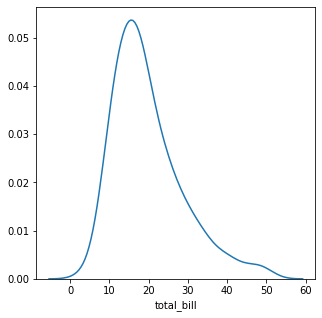

In [59]:
# 1개 그래프 subplots 이용해서 그려보기

#step 1
fig, axs = plt.subplots(1, 1, figsize = (5,5))

#step 2
axs = sns.distplot(tips['total_bill'], kde = True, hist = False) #어차피 그림 하나니까 ax = axs는 빼도 됨 

plt.show()

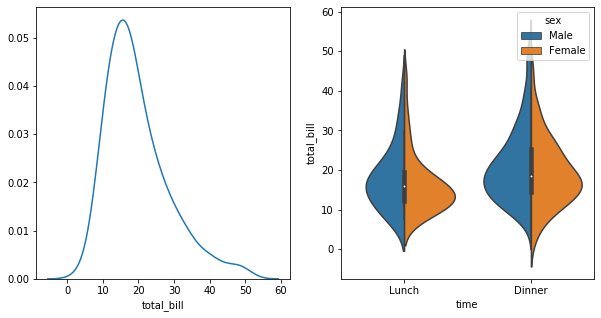

In [60]:
# 1x2 그래프 그리기

#step 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

#step 2
ax1 = sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax1)
ax2 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax2)

plt.show()

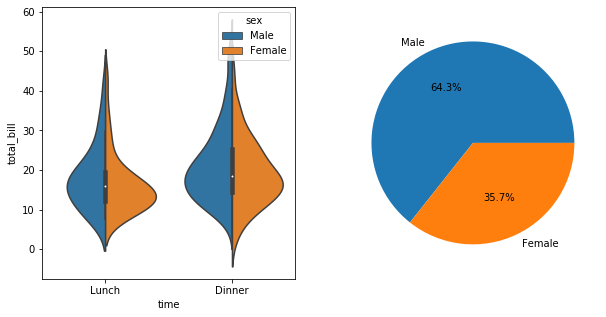

In [61]:
# plt 기반 그림은 ax 축 설정 NO

#step 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

#step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = plt.pie(x = list(new['sex']), 
           labels = list(new['index']),
           autopct = '%.1f%%') #<- 이 경우는 ax를 쓰지 않음

plt.show()

#### 3개 이상의 plot은 축에 flatten 옵션을 활용한다.

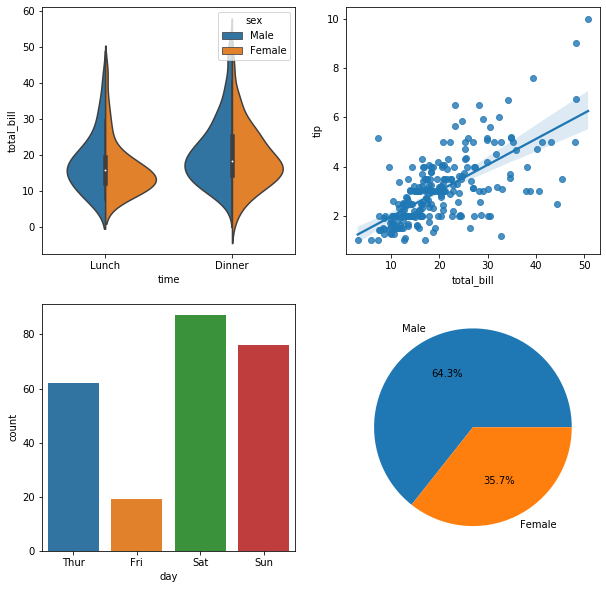

In [62]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 = plt.pie(x = list(new['sex']), 
           labels = list(new['index']),
           autopct = '%.1f%%') #<- 이 경우는 ax를 쓰지 않음


plt.show()

#### 꾸미기 옵션
- axs.set_title() : 제목
- axs.set_xlabel() : x축 이름
- axs.set_ylabel() : y축 이름
---
- axs.set_xticks(범위) : x축 눈금
- axs.set_yticks(범위) : y축 눈금

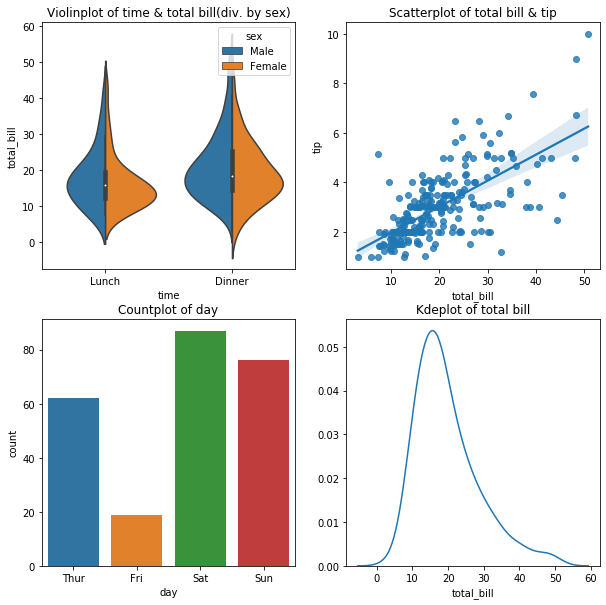

In [63]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4)

# step 3
ax1.set_title('Violinplot of time & total bill(div. by sex)')
ax2.set_title('Scatterplot of total bill & tip')
ax3.set_title('Countplot of day')
ax4.set_title('Kdeplot of total bill')


plt.show()

#### fig.tight_layout 옵션을 쓰면 그래프를 좀 더 보기좋게 확장해준다.(간격 변경)

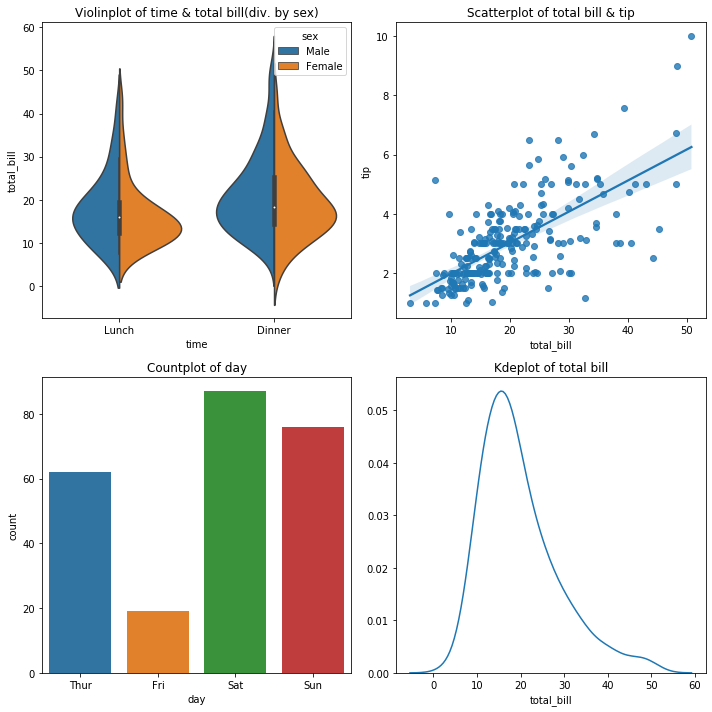

In [64]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4)

# step 3
ax1.set_title('Violinplot of time & total bill(div. by sex)')
ax2.set_title('Scatterplot of total bill & tip')
ax3.set_title('Countplot of day')
ax4.set_title('Kdeplot of total bill')

fig.tight_layout()
plt.show()

#### step 3 꾸미기를 plot 설정할 때부터 할 수도 있다!

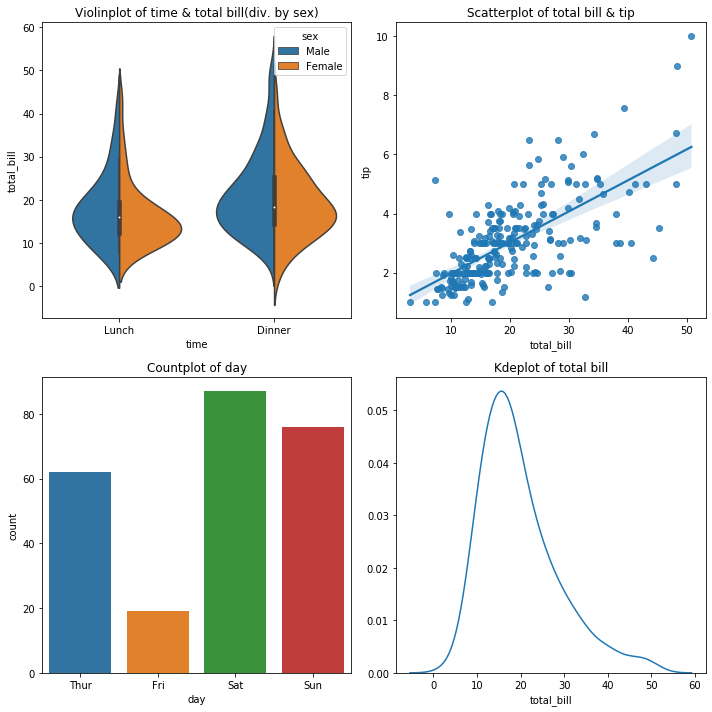

In [65]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2~3
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1).set_title('Violinplot of time & total bill(div. by sex)')
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2).set_title('Scatterplot of total bill & tip')
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3).set_title('Countplot of day')
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4).set_title('Kdeplot of total bill')

fig.tight_layout()
plt.show()

#### 설정 추가

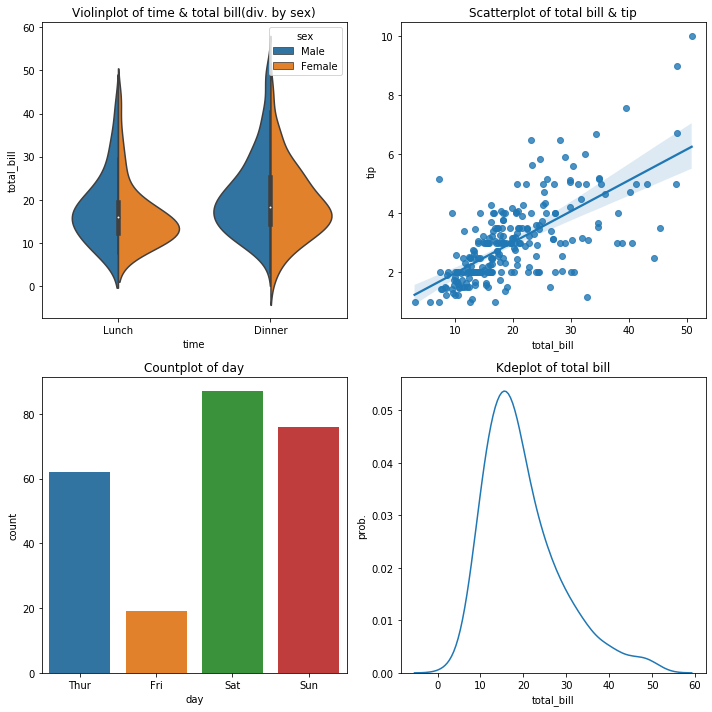

In [66]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4)

# step 3
ax1.set_title('Violinplot of time & total bill(div. by sex)')
ax2.set_title('Scatterplot of total bill & tip')
ax3.set_title('Countplot of day')
ax4.set_title('Kdeplot of total bill')

## y축 이름 설정 추가 
ax4.set_ylabel('prob.')

fig.tight_layout()
plt.show()

축 범위 설정

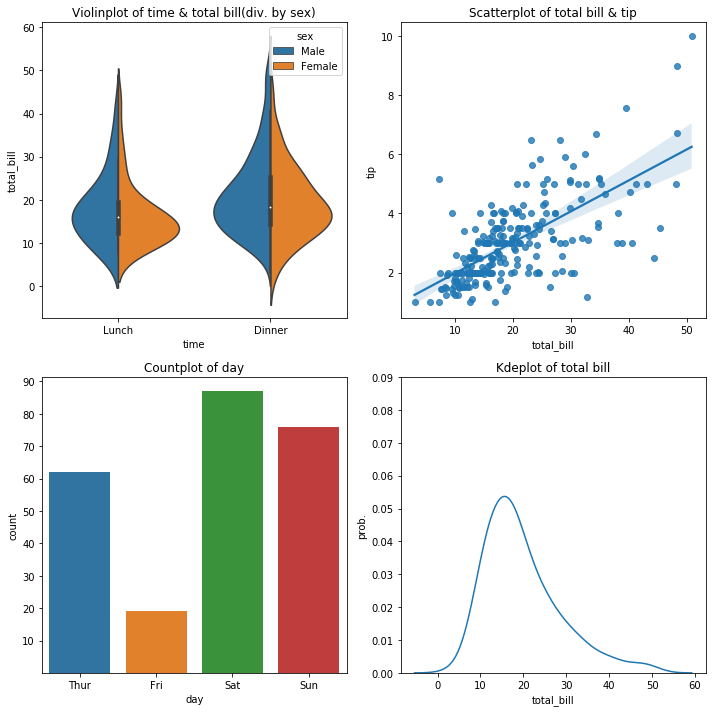

In [67]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (10,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4)

# step 3
ax1.set_title('Violinplot of time & total bill(div. by sex)')
ax2.set_title('Scatterplot of total bill & tip')
ax3.set_title('Countplot of day')
ax4.set_title('Kdeplot of total bill')

## y축 이름 설정 추가 
ax4.set_ylabel('prob.')

## y축 눈금 범위 변경
ax3.set_yticks(np.arange(10, 100, 10))
ax4.set_yticks(np.arange(0,0.1,0.01))

fig.tight_layout()
plt.show()

전체 제목 설정

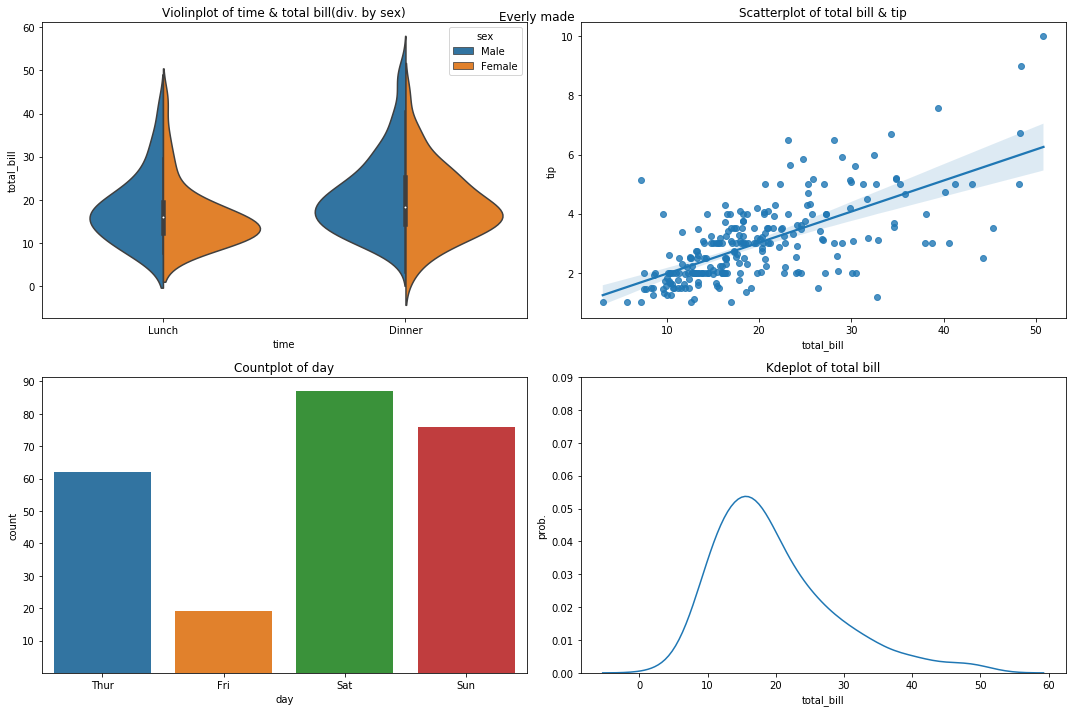

In [68]:
# step 1
fig, axs = plt.subplots(2, 2, figsize = (15,10))
ax1, ax2, ax3, ax4 = axs.flatten() #<- flatten 활용

# step 2
ax1 = sns.violinplot(x= 'time', y = 'total_bill', hue = 'sex', data = tips, split = True, ax = ax1)
ax2 = sns.regplot(x= 'total_bill', y = 'tip', data = tips, ax = ax2)
ax3 = sns.countplot(x = 'day', data = tips, ax = ax3)
ax4 =  sns.distplot(tips['total_bill'], kde = True, hist = False, ax = ax4)

# step 3
ax1.set_title('Violinplot of time & total bill(div. by sex)')
ax2.set_title('Scatterplot of total bill & tip')
ax3.set_title('Countplot of day')
ax4.set_title('Kdeplot of total bill')

## y축 이름 설정 추가 
ax4.set_ylabel('prob.')

## y축 눈금 범위 변경
ax3.set_yticks(np.arange(10, 100, 10))
ax4.set_yticks(np.arange(0,0.1,0.01))

# 전체 제목 설정 
fig.suptitle('Everly made')
fig.tight_layout()

plt.show()
